#Generative Adversarial Networks (GANs)

GANs consist of two neural networks, a generator and a discriminator, trained together in a competitive setting. The generator creates synthetic data samples, while the discriminator learns to distinguish between real and fake samples. GANs are used for generating realistic images, data augmentation, and other tasks in generative modeling.

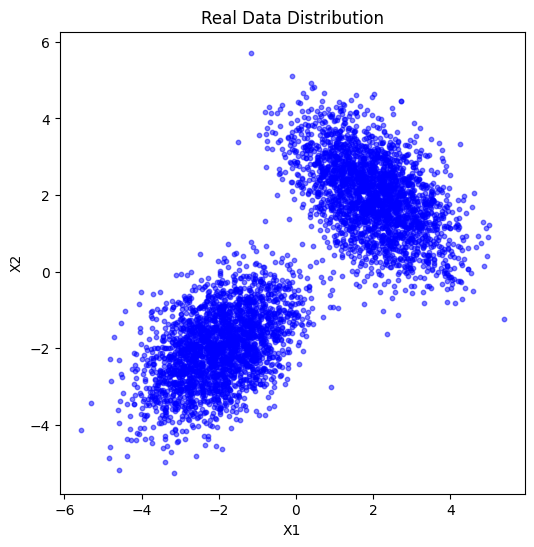

2/2 [==============================] - 0s 6ms/step
Epoch: 0 | Discriminator Loss: 0.7023987770080566 | Generator Loss: 0.6804352402687073
2/2 [==============================] - 0s 6ms/step
Epoch: 20 | Discriminator Loss: 0.5650718808174133 | Generator Loss: 0.6443008780479431
2/2 [==============================] - 0s 5ms/step
Epoch: 40 | Discriminator Loss: 0.5459803342819214 | Generator Loss: 0.6654006242752075
2/2 [==============================] - 0s 4ms/step
Epoch: 60 | Discriminator Loss: 0.5367336273193359 | Generator Loss: 0.74494868516922
2/2 [==============================] - 0s 4ms/step
Epoch: 80 | Discriminator Loss: 0.5240728855133057 | Generator Loss: 0.8520056009292603
2/2 [==============================] - 0s 5ms/step
Epoch: 100 | Discriminator Loss: 0.38327494263648987 | Generator Loss: 1.0543062686920166
2/2 [==============================] - 0s 4ms/step
Epoch: 120 | Discriminator Loss: 0.42209702730178833 | Generator Loss: 1.0794103145599365
2/2 [=====================

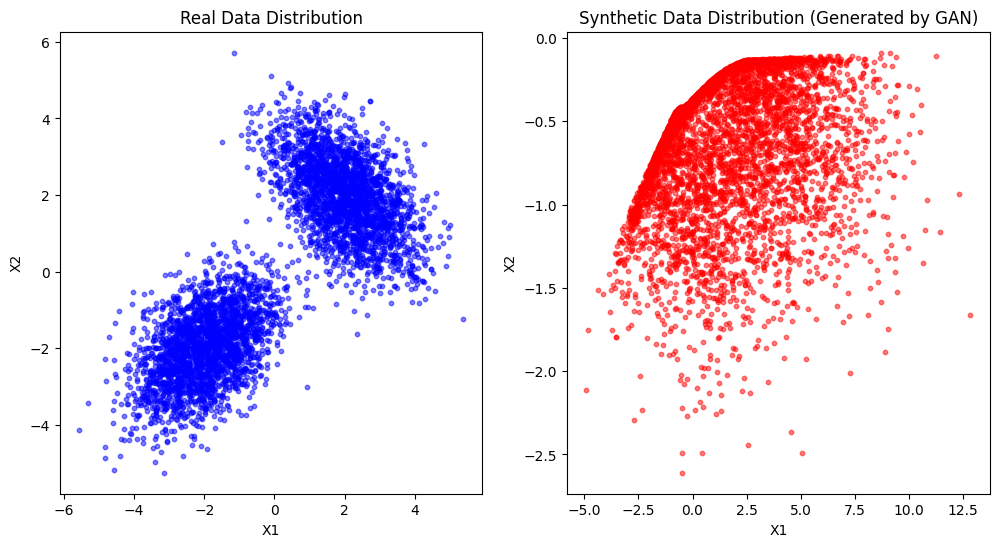

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Function to generate synthetic data from Gaussian distributions
def generate_data(num_samples):
    mean1 = [-2, -2]
    cov1 = [[1, 0.5], [0.5, 1]]  # covariance matrix for Gaussian 1

    mean2 = [2, 2]
    cov2 = [[1, -0.5], [-0.5, 1]]  # covariance matrix for Gaussian 2

    data1 = np.random.multivariate_normal(mean1, cov1, num_samples//2)
    data2 = np.random.multivariate_normal(mean2, cov2, num_samples//2)

    real_data = np.concatenate([data1, data2], axis=0)
    return real_data

# Define GAN architecture
def build_gan():
    # Generator
    generator = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(2)  # Output layer with 2 dimensions
    ])

    # Discriminator
    discriminator = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # GAN
    discriminator.trainable = False  # Fix the discriminator during GAN training

    gan_input = tf.keras.Input(shape=(2,))
    gan_output = discriminator(generator(gan_input))

    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')

    return gan, generator, discriminator

# Function to train GAN
def train_gan(gan, generator, discriminator, real_data, epochs, batch_size):
    for epoch in range(epochs):
        # Generate fake data using the generator
        noise = np.random.normal(0, 1, size=(batch_size, 2))
        fake_data = generator.predict(noise)

        # Combine real and fake data
        real_data_batch = real_data[np.random.randint(0, real_data.shape[0], batch_size)]
        x = np.concatenate([real_data_batch, fake_data])
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        y = np.concatenate([y_real, y_fake])

        # Train discriminator
        d_loss = discriminator.train_on_batch(x, y)

        # Train generator via GAN
        noise = np.random.normal(0, 1, size=(batch_size, 2))
        y_gan = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, y_gan)

        # Print progress
        if epoch % 20 == 0:
            print(f"Epoch: {epoch} | Discriminator Loss: {d_loss[0]} | Generator Loss: {g_loss}")

# Main function to run GAN
def main():
    # Parameters
    num_samples = 5000  # Total number of data points
    batch_size = 64
    epochs = 200

    # Generate synthetic dataset
    real_data = generate_data(num_samples)

    # Plot the real data
    plt.figure(figsize=(6, 6))
    plt.scatter(real_data[:, 0], real_data[:, 1], s=10, color='blue', alpha=0.5)
    plt.title('Real Data Distribution')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

    # Build GAN
    gan, generator, discriminator = build_gan()

    # Train GAN
    train_gan(gan, generator, discriminator, real_data, epochs, batch_size)

    # Generate synthetic data using the trained generator
    synthetic_data = generator.predict(np.random.normal(0, 1, size=(num_samples, 2)))

    # Plot real and synthetic data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(real_data[:, 0], real_data[:, 1], s=10, color='blue', alpha=0.5)
    plt.title('Real Data Distribution')
    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.subplot(1, 2, 2)
    plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], s=10, color='red', alpha=0.5)
    plt.title('Synthetic Data Distribution (Generated by GAN)')
    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
import tensorflow as tf

# Generator Network
generator = tf.keras.Sequential([
    # Dense (Fully Connected) Layer with ReLU activation
    tf.keras.layers.Dense(256, activation='relu', input_shape=(100,)),
    # BatchNormalization Layer (for stabilizing training)
    tf.keras.layers.BatchNormalization(),

    # Reshape Layer to 3D tensor (4x4x16)
    tf.keras.layers.Reshape((4, 4, 16)),

    # Conv2DTranspose Layer (upsampling to 8x8x64)
    tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    # SpatialDropout2D Layer (2D dropout for convolutional outputs)
    tf.keras.layers.SpatialDropout2D(0.25),

    # UpSampling2D Layer (upsampling to 16x16x64)
    tf.keras.layers.UpSampling2D(size=(2, 2)),
    # Conv2D Layer with ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    # Cropping2D Layer (crop the image tensor)
    tf.keras.layers.Cropping2D(cropping=((2, 2), (2, 2))),

    # DepthwiseConv2D Layer (depthwise separable convolution)
    tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),

    # GlobalAveragePooling2D Layer (global average pooling)
    tf.keras.layers.GlobalAveragePooling2D(),

    # Transposed Convolutional Layer (upsampling to 32x32x32) with Tanh activation (output layer)
    tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='tanh'),
])

# Compile Generator (not required for generator in GAN training)
generator.compile(optimizer='adam', loss='binary_crossentropy')

### Discriminator Network

# Discriminator Network
discriminator = tf.keras.Sequential([
    # Conv2D Layer (downsampling to 16x16x32)
    tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.2), input_shape=(32, 32, 1)),
    # SpatialDropout2D Layer (2D dropout for convolutional outputs)
    tf.keras.layers.SpatialDropout2D(0.25),

    # SeparableConv2D Layer (depthwise separable convolution)
    tf.keras.layers.SeparableConv2D(64, (3, 3), strides=(2, 2), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.2)),

    # MaxPooling2D Layer (downsampling using max pooling)
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # GlobalMaxPooling2D Layer (global max pooling)
    tf.keras.layers.GlobalMaxPooling2D(),

    # LocallyConnected2D Layer (locally connected layer)
    tf.keras.layers.LocallyConnected2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.2)),

    # Flatten Layer (convert to 1D tensor)
    tf.keras.layers.Flatten(),

    # Dense (Fully Connected) Layer with Sigmoid activation (output layer)
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile Discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Example usage of compiled models (not necessary in GAN training)
# generator_output = generator.predict(noise_input)
# discriminator_output = discriminator.predict(data_input)
